# 6. Modelado

Para a realizar este modelo utilizamos la librería **pycaret** 
Definimos la variable **precio_euro** como nuestra variable objetivo y se selecciona el modelo de regresión lineal.

En la implementación de este modelo, utilizamos la biblioteca **pycaret**. Nuestro objetivo principal es predecir la variable **"precio_euro"**, por lo que la configuramos como nuestra variable objetivo. Para lograr esto, elegimos el modelo de regresión lineal.


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('df_limpio.csv')

In [4]:
#Seleccionamos las variables que nos interesan en un nuevo df
df_modelo = df.copy()
df_modelo = df_modelo[['neighbourhood', 'property_type', 'accommodates', 'room_type', 'maximum_nights', 'minimum_nights','price_euro']]
df_modelo.head() 

,neighbourhood,property_type,accommodates,room_type,maximum_nights,minimum_nights,price_euro
0,Besiktas,Entire rental unit,3,Entire home/apt,1125,25,95
1,Beyoglu,Entire rental unit,2,Entire home/apt,90,10,47
2,Beyoglu,Entire rental unit,4,Entire home/apt,365,28,51
3,Sisli,Private room in loft,2,Private room,10,2,17
4,Sisli,Entire serviced apartment,5,Entire home/apt,360,10,84


In [10]:
print('El df esta formado por: ', df_modelo.shape[0], 'filas y', df_modelo.shape[1], 'columnas')
print('Cantidad de valores duplicados: ',df_modelo.duplicated().sum())
print('Cantidad de valores nulos: ', df_modelo.isnull().sum().sum())

El df esta formado por:  41501 filas y 7 columnas
Cantidad de valores duplicados:  7591
Cantidad de valores nulos:  0


<Axes: xlabel='room_type', ylabel='price_euro'>

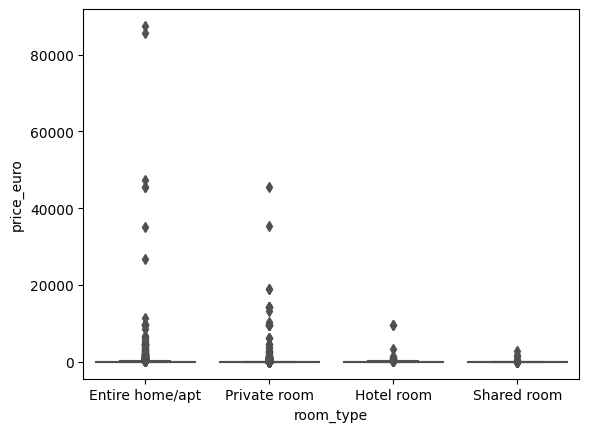

In [11]:
sns.boxplot(x="room_type", y="price_euro", data=df_modelo,palette='rainbow')

# Modelización

In [13]:
#importamos pycaret regression para calcular el price
from pycaret.regression import *

In [14]:
#hacemos un setup con visa a nuestro target price
setup = setup(df_modelo, target = 'price_euro',remove_outliers = True)

,Description,Value
0,Session id,3934
1,Target,price_euro
2,Target type,Regression
3,Original data shape,"(41501, 7)"
4,Transformed data shape,"(40053, 10)"
5,Transformed train set shape,"(27602, 10)"
6,Transformed test set shape,"(12451, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [15]:
#Evaluamos modelos
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:56:49
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,73.8037,908771.8813,807.5797,0.0048,0.8504,1.1501,2.5390
ridge,Ridge Regression,73.8042,908770.2240,807.5774,0.0048,0.8503,1.1502,0.5620
lasso,Lasso Regression,73.8065,908810.4464,807.6152,0.0047,0.8480,1.1419,0.5420
llar,Lasso Least Angle Regression,73.8065,908810.4433,807.6152,0.0047,0.8480,1.1419,0.5350
en,Elastic Net,73.9266,908819.2090,807.6393,0.0045,0.8504,1.1595,0.5160
huber,Huber Regressor,59.3067,910334.9062,808.2608,0.0039,0.6620,0.5215,0.7050
br,Bayesian Ridge,76.5862,909313.3222,808.2416,0.0005,0.9085,1.3260,0.5290
dummy,Dummy Regressor,77.8895,910367.5140,808.7640,-0.0006,0.9788,1.5188,0.6950
omp,Orthogonal Matching Pursuit,78.1867,910420.3044,808.8214,-0.0010,0.9833,1.5295,0.5200
ada,AdaBoost Regressor,78.7352,925889.6961,815.5788,-0.0164,0.9157,1.4768,0.7050


In [16]:
#Vemos que el que mejor nos viene es regresión lineal
lr = create_model('lr') # lo creamos

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,94.2472,2731011.5343,1652.5772,0.0003,0.8942,1.1932
1,73.5408,796408.7044,892.4173,0.0029,0.8532,1.1726
2,60.9491,70094.1219,264.7529,0.0001,0.8837,1.2539
3,88.0043,1172191.9043,1082.6781,0.0017,0.8378,1.0974
4,58.1696,67056.0454,258.9518,0.0177,0.8417,1.1500
5,71.8532,547392.1665,739.8596,0.0023,0.8289,1.0756
6,56.0871,54098.7364,232.5914,0.0100,0.8468,1.1649
7,68.5321,740219.4052,860.3600,-0.0000,0.8243,1.1003
8,67.9749,198061.5964,445.0411,0.0127,0.8548,1.1964


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
# lo tuneamos XD
tuned_lr = tune_model(lr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:00:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,94.2472,2731011.5343,1652.5772,0.0003,0.8942,1.1932
1,73.5408,796408.7044,892.4173,0.0029,0.8532,1.1726
2,60.9491,70094.1219,264.7529,0.0001,0.8837,1.2539
3,88.0043,1172191.9043,1082.6781,0.0017,0.8378,1.0974
4,58.1696,67056.0454,258.9518,0.0177,0.8417,1.1500
5,71.8532,547392.1665,739.8596,0.0023,0.8289,1.0756
6,56.0871,54098.7364,232.5914,0.0100,0.8468,1.1649
7,68.5321,740219.4052,860.3600,-0.0000,0.8243,1.1003
8,67.9749,198061.5964,445.0411,0.0127,0.8548,1.1964


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
#Veamos como se comporta
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
#finalizamos el modelo
final_lr_best = finalize_model(tuned_lr)

In [20]:
#guardamos el modelo 
save_model( final_lr_best, 'ml_airbnb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\fabia\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['accommodates', 'maximum_nights',
                                              'minimum_nights'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['neighbourhood', 'property_type',
                                              'room_type'],
                                     transformer=SimpleImputer(strategy='most...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['neighbourhood', 'property_type'],
                                     transformer=TargetEncoder(cols=['neighbourhood',
                          

In [5]:
df_modelo['neighbourhood'].unique()

array(['Besiktas', 'Beyoglu', 'Sisli', 'Sariyer', 'Fatih', 'Uskudar',
       'Kadikoy', 'Kagithane', 'Basaksehir', 'Bagcilar', 'Maltepe',
       'Esenyurt', 'Beykoz', 'Cekmekoy', 'Sancaktepe', 'Atasehir',
       'Tuzla', 'Pendik', 'Bahcelievler', 'Kartal', 'Beylikduzu',
       'Bakirkoy', 'Adalar', 'Gaziosmanpasa', 'Zeytinburnu',
       'Kucukcekmece', 'Umraniye', 'Eyup', 'Gungoren', 'Avcilar', 'Sile',
       'Arnavutkoy', 'Buyukcekmece', 'Bayrampasa', 'Catalca', 'Esenler',
       'Silivri', 'Sultangazi', 'Sultanbeyli'], dtype=object)

In [6]:
df_modelo['property_type'].unique()

array(['Entire rental unit', 'Private room in loft',
       'Entire serviced apartment', 'Private room in home',
       'Private room in rental unit', 'Entire home',
       'Room in serviced apartment', 'Entire loft',
       'Private room in villa', 'Private room in serviced apartment',
       'Entire condo', 'Private room in townhouse', 'Shared room in home',
       'Entire cabin', 'Camper/RV', 'Room in aparthotel',
       'Shared room in rental unit', 'Room in boutique hotel',
       'Private room in condo', 'Private room', 'Entire villa',
       'Private room in bed and breakfast', 'Entire bed and breakfast',
       'Entire townhouse', 'Entire chalet', 'Room in hotel',
       'Entire cottage', 'Shared room in loft', 'Shared room in hotel',
       'Tiny home', 'Private room in yurt', 'Room in hostel',
       'Room in bed and breakfast', 'Shared room in condo',
       'Private room in treehouse', 'Private room in hostel',
       'Entire vacation home', 'Earthen home', 'Tent',
       '

In [7]:
df_modelo['accommodates'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8, 10, 12, 16, 11, 13, 14, 15,  9],
      dtype=int64)

In [ ]:
'Private room', 'Entire home/apt', 'Shared room'

In [9]:
df_modelo['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [11]:
df_modelo['minimum_nights'].unique()

array([ 25,  10,  28,   2,   3,   1,   7,   5,   4,  14,   6,  30, 360,
        15,  20,   8, 365, 210,  90, 999,  21, 300,  50, 699, 180,  60,
        88,  29,  27,  13, 730, 120,  91, 720,  24, 150, 200,   9,  12,
       250, 500, 183,  99, 100, 280,  45,  79,  96,  31, 185,  59,  62,
       364,  42, 222,  40,  11, 240,  61,  55, 105,  95,  75,  58, 600,
        16,  66,  85, 400, 110,  17,  35, 181, 260,  19,  92,  80,  18,
        63,  70,  22,  56, 130, 350,  84, 186,  89,  26, 270, 170,  32,
        74, 140,  87], dtype=int64)